<a href="https://colab.research.google.com/github/Vivekanand1435/EDA-and-Visualization/blob/main/EV_Charging_behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**
EV charging behavior and metrics like energy consumed, charging duration or charging cost based on user behavior, vehicle type and environmental conditions

In [ ]:
# 1. Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# 2. Load the dataset
file_path = '/content/ev_charging_patterns.csv'  # Update with your path
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


**3. Inspect the Data**
check the dataset for missing values, datatypes, and basic statistics

In [ ]:
# Check the data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [ ]:
num_vehicle_models = df['Vehicle Model'].nunique()
num_vehicle_models

5

In [ ]:
# Check for missing values
df.isnull().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),66
Charging Duration (hours),0
Charging Rate (kW),66


In [ ]:
# Basic statistics
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


**4. Handle Missing Values**
impute or drop missing values as needed

In [ ]:
# Option 1: Fill missing values
df['Energy Consumed (kWh)'].fillna(df['Energy Consumed (kWh)'].mean(), inplace=True)
df['Charging Rate (kW)'].fillna(df['Charging Rate (kW)'].median(), inplace=True)

# Option 2: Drop rows with missing values
df.dropna(inplace=True)

<ipython-input-9-d997665c208a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Energy Consumed (kWh)'].fillna(df['Energy Consumed (kWh)'].mean(), inplace=True)
<ipython-input-9-d997665c208a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

**5. Univariate Analysis**
Analyze single variables using histograms, boxplots, and bar charts

Numerical variable

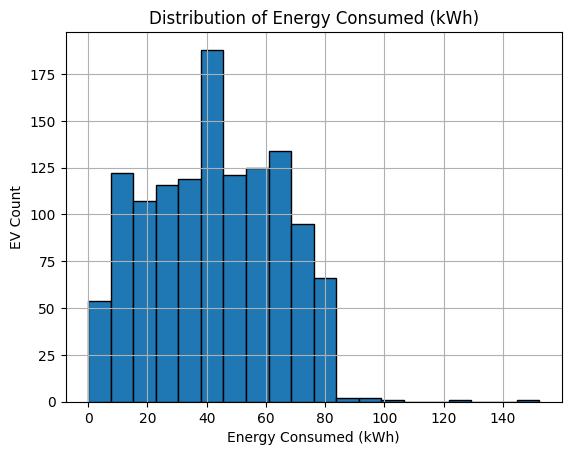

In [ ]:
# Histogram for numerical variables
df['Energy Consumed (kWh)'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Energy Consumed (kWh)')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('EV Count')
plt.show()

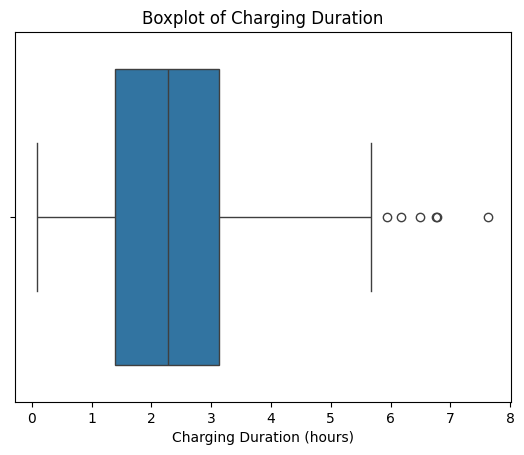

In [ ]:
# Boxplot for outliers
sns.boxplot(x=df['Charging Duration (hours)'])
plt.title('Boxplot of Charging Duration')
plt.show()

Categorical Variables

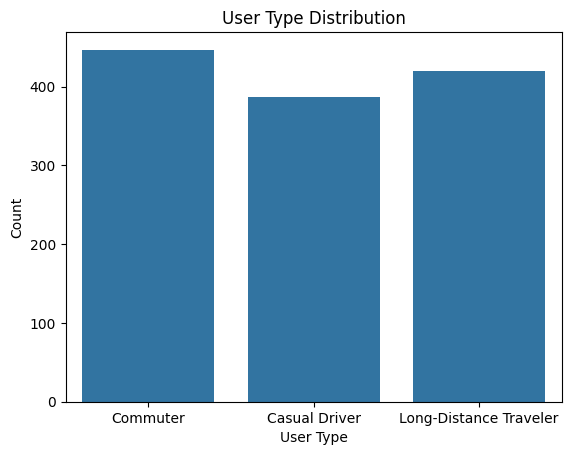

In [ ]:
# Bar chart for categorical variables
sns.countplot(x='User Type', data=df)
plt.title('User Type Distribution')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()


**6. Bivariate Analysis** Analyze relationships between two variables using scatter plots, boxplots, and heatmaps

Numerical vs Numerical

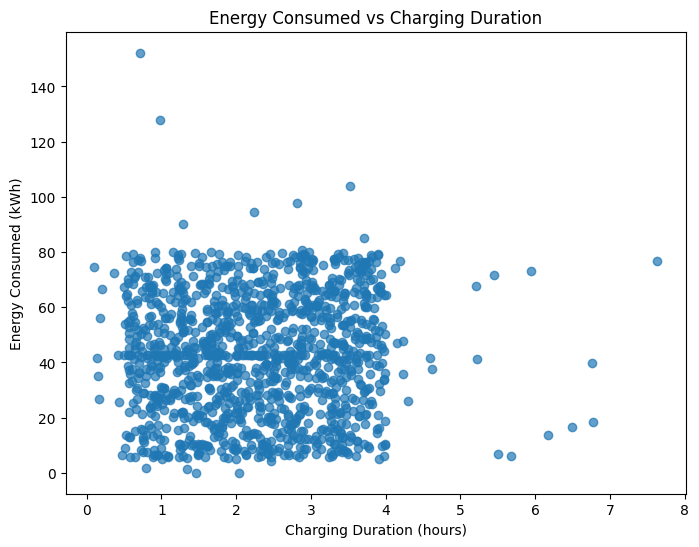

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Charging Duration (hours)'], df['Energy Consumed (kWh)'], alpha=0.7)
plt.title('Energy Consumed vs Charging Duration')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()


Categorical vs Numerical

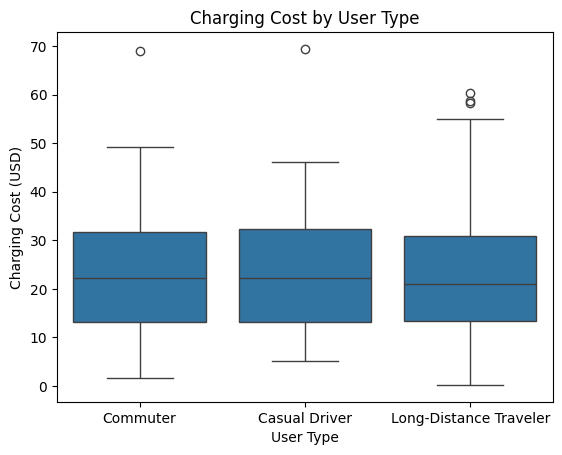

In [ ]:
# Boxplot
sns.boxplot(x='User Type', y='Charging Cost (USD)', data=df)
plt.title('Charging Cost by User Type')
plt.xlabel('User Type')
plt.ylabel('Charging Cost (USD)')
plt.show()


Correlation Heatmap

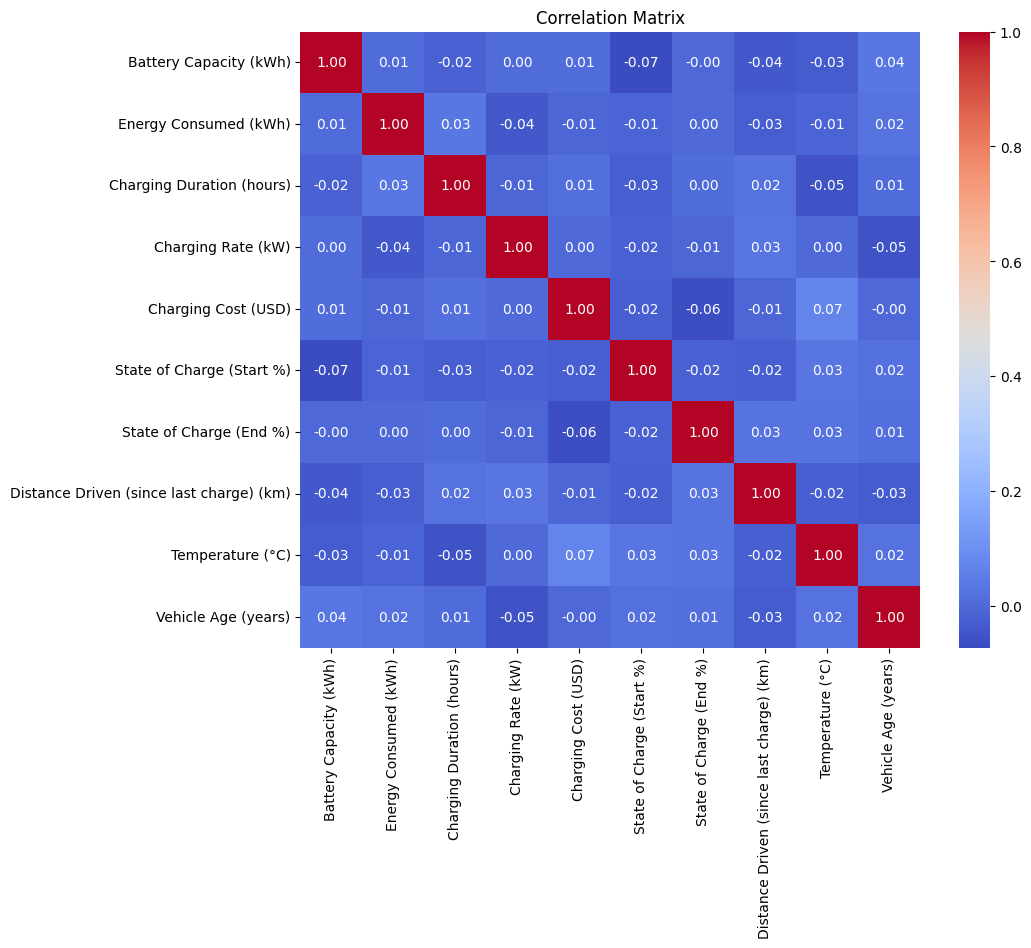

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()


### **7. Time-based Analysis** Analyze trends over time if the dataset contains time variables

In [ ]:
# Convert time columns to datetime
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

In [ ]:
# Extract hour of the day
df['Hour'] = df['Charging Start Time'].dt.hour

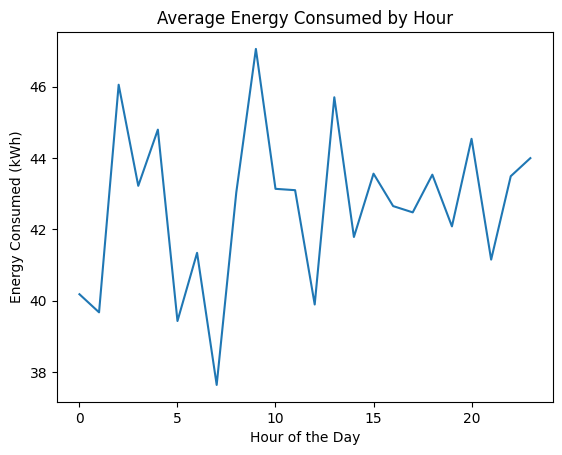

In [ ]:
# Plot hourly energy consumption
hourly_energy = df.groupby('Hour')['Energy Consumed (kWh)'].mean().reset_index()
sns.lineplot(x='Hour', y='Energy Consumed (kWh)', data=hourly_energy)
plt.title('Average Energy Consumed by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumed (kWh)')
plt.show()

**8. Interactive Visualizations (Using Plotly)** Add interactivity for better exploration

In [ ]:
# Interactive scatter plot
fig = px.scatter(df, x='Charging Duration (hours)', y='Energy Consumed (kWh)', color='User Type',
                 title='Energy Consumed vs Charging Duration')
fig.show()

In [ ]:
# Interactive bar chart
fig = px.bar(df, x='Day of Week', y='Charging Cost (USD)', color='User Type',
             title='Charging Cost by Day of Week and User Type', barmode='group')
fig.show()

#**9. Insights and Summary**

*  Peak charging occurs in the evening, with higher costs for long-distance travelers
*   Outliers in charging duration for specific vehicle models
*   Higher temperatures correlate with reduced charging efficiency





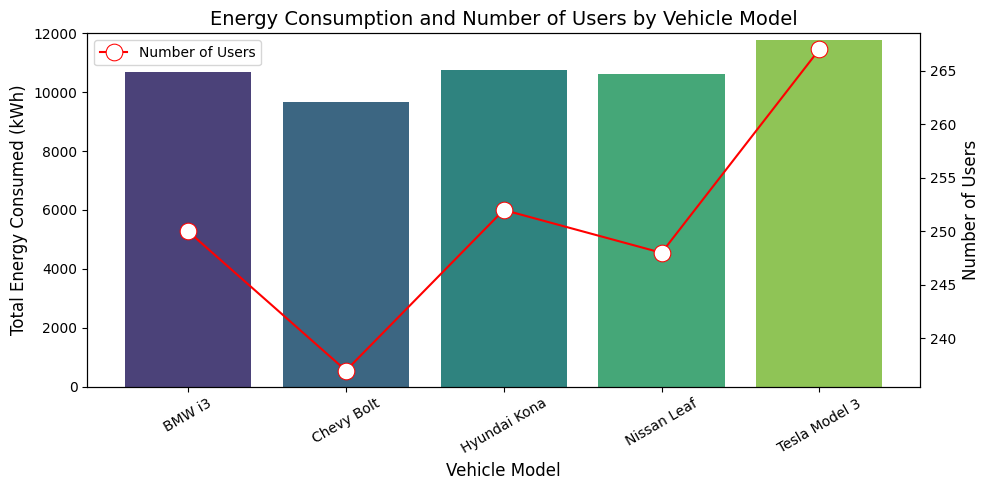

In [ ]:
# Question: Plot a Energy Consumption(KWh) with unique vehicle model along with no. of user?
## Aggregate data to calculate total energy consumption and the number of users for each vehicle model
energy_users_by_model = df.groupby('Vehicle Model').agg(
    total_energy_consumed=('Energy Consumed (kWh)', 'sum'),
    num_users=('User ID', 'nunique')
).reset_index()

# Create a dual-axis bar plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for energy consumption
sns.barplot(
    x='Vehicle Model',
    y='total_energy_consumed',
    data=energy_users_by_model,
    ax=ax1,
    hue='Vehicle Model',
    hue_order=energy_users_by_model['Vehicle Model'],
    palette='viridis',
    label='Total Energy Consumed (kWh)'
)
ax1.set_ylabel('Total Energy Consumed (kWh)', fontsize=12)
ax1.set_xlabel('Vehicle Model', fontsize=12)
ax1.set_title('Energy Consumption and Number of Users by Vehicle Model', fontsize=14)
ax1.tick_params(axis='x', rotation=30)
ax1.set_ylim(0, 12000)  # Adjust scale to 12000

# Line plot for number of users
ax2 = ax1.twinx()
sns.lineplot(
    x='Vehicle Model',
    y='num_users',
    data=energy_users_by_model,
    ax=ax2,
    color='red',
    marker='o',
    markersize=12,
    markeredgecolor='red',
    markerfacecolor='white',
    label='Number of Users'
)
ax2.set_ylabel('Number of Users', fontsize=12)
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


<ipython-input-115-64ff620d4fc1>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




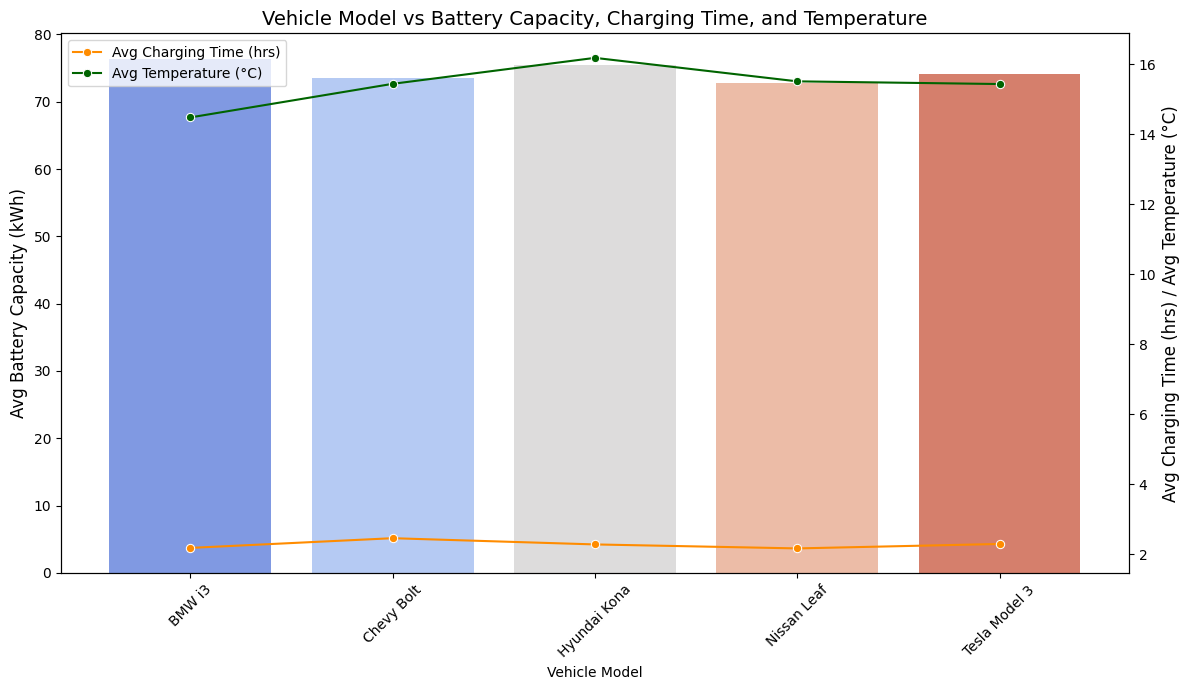

In [ ]:
# Question: Plot a graph for unique vehicle model with their battery capacity, charging time and temperature during charging and risk analysis?

# Aggregate data to calculate mean battery capacity, charging time, and temperature for each vehicle model
vehicle_model_data = df.groupby('Vehicle Model').agg(
    Avg_Battery_Capacity=('Battery Capacity (kWh)', 'mean'),
    Avg_Charging_Time=('Charging Duration (hours)', 'mean'),
    Avg_Temperature=('Temperature (°C)', 'mean')
).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 7))

# Bar plot for battery capacity
sns.barplot(x='Vehicle Model', y='Avg_Battery_Capacity', data=vehicle_model_data, palette='coolwarm', ax=ax1)
ax1.set_ylabel('Avg Battery Capacity (kWh)', fontsize=12)
ax1.set_title('Vehicle Model vs Battery Capacity, Charging Time, and Temperature', fontsize=14)
ax1.tick_params(axis='x', rotation=45)

# Line plot for charging time and temperature
ax2 = ax1.twinx()
sns.lineplot(x='Vehicle Model', y='Avg_Charging_Time', data=vehicle_model_data, color='darkorange', marker='o', label='Avg Charging Time (hrs)', ax=ax2)
sns.lineplot(x='Vehicle Model', y='Avg_Temperature', data=vehicle_model_data, color='darkgreen', marker='o', label='Avg Temperature (°C)', ax=ax2)
ax2.set_ylabel('Avg Charging Time (hrs) / Avg Temperature (°C)', fontsize=12)
ax2.legend(loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Plot histogram for Charging Time
plt.figure(figsize=(12, 6))
plt.hist(dataset['Charging Duration (hours)'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Charging Duration (hours)', fontsize=14)
plt.xlabel('Charging Duration (hours)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Plot histogram for Temperature
plt.figure(figsize=(12, 6))
plt.hist(dataset['Temperature (°C)'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Histogram of Temperature (°C)', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

NameError: name 'dataset' is not defined

<Figure size 1200x600 with 0 Axes>